# Análisis exploratorio de datos (EDA)

### 1. Importación de Bibliotecas

In [4]:
'''python
Análisis exploratorio de datos.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install sweetviz
import sweetviz as sv

# Añadimos "scipy" para calcular Z-score, yeojhonson y winsorize
from scipy.stats import zscore
from scipy.stats import yeojohnson
from scipy.stats.mstats import winsorize

# Para la selección de características
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

### 2. Cargar el dataset

In [6]:

df = pd.read_csv('bank_dataset.csv')


### 3. Muestra las primeras filas del dataset

In [8]:

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### 4. Información general del dataset

Como se comprueba fácilmente se cuenta con 11.162 registros de datos. Claramente suficientes.
De los campos listados abajo "job", "marital", "education", "default", "housing", "loan", "contact", "month" y "poutcame" (9 en total) son características discretas. "age", "balance", "day", "duration", "campaign", "pdays", "previous" (7 en total) son características continuas.

Nuestro objetivo, nuestra predicción, "diposit", es discreta.

In [12]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


Del resumen del dataset las variables de tipo "float64" e "int64" son continuas. Las de tipo "object" son categóricas.

### 5. Descripción estadística del dataset

In [15]:

df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### 6. Histograma de cada variable numérica

Se comprueba que las características continuas no muestran distribuciones normales.

Empezamos con "age", muestra un claro sesgo hacia la derecha y encontramos outliers. Para acondicionarla usaremos un logaritmo para reducir su sesgo y la winsorizaremos.

"balance" también muestra un fuerte sesgo y outliers. Muestra, además, valores negativos, no se podrá pues modificar con logaritmos o raices cuadradas. Utilizaremos la transformación "Yeo-Johnson", para winsorizarla luego.

"pdays" también es una distribución con fuerte "skew" y outliers. Contiene valores negativos, utilizaremos la transformación "Yeo-Johnson". No requerirá winsorización.

Por último, "campaign" y "previous" se tratarán de modo similar, se calculará su logaritmo. Se tratarán los outliers mediante winsorización.

En la sección "12. anexo" se muestra cómo mejora el sesgo y los outliers mediante dichas técnicas.

Finalmente la variable "day" está definida como el "dia de la semana" en que se realizó el contacto. Pero sus valores van del 1 al 31, no del 1 al 7, como podríamos esperar. Aún aceptando que fueran los días del mes, no disponemos del año en el que se realizó la campaña, luego no podemos imputar dichos valores a un día de la semana. Más aún, esta variable debería ejercer poca influencia en la predicción, como se verá en la sección "9. Selección de características".

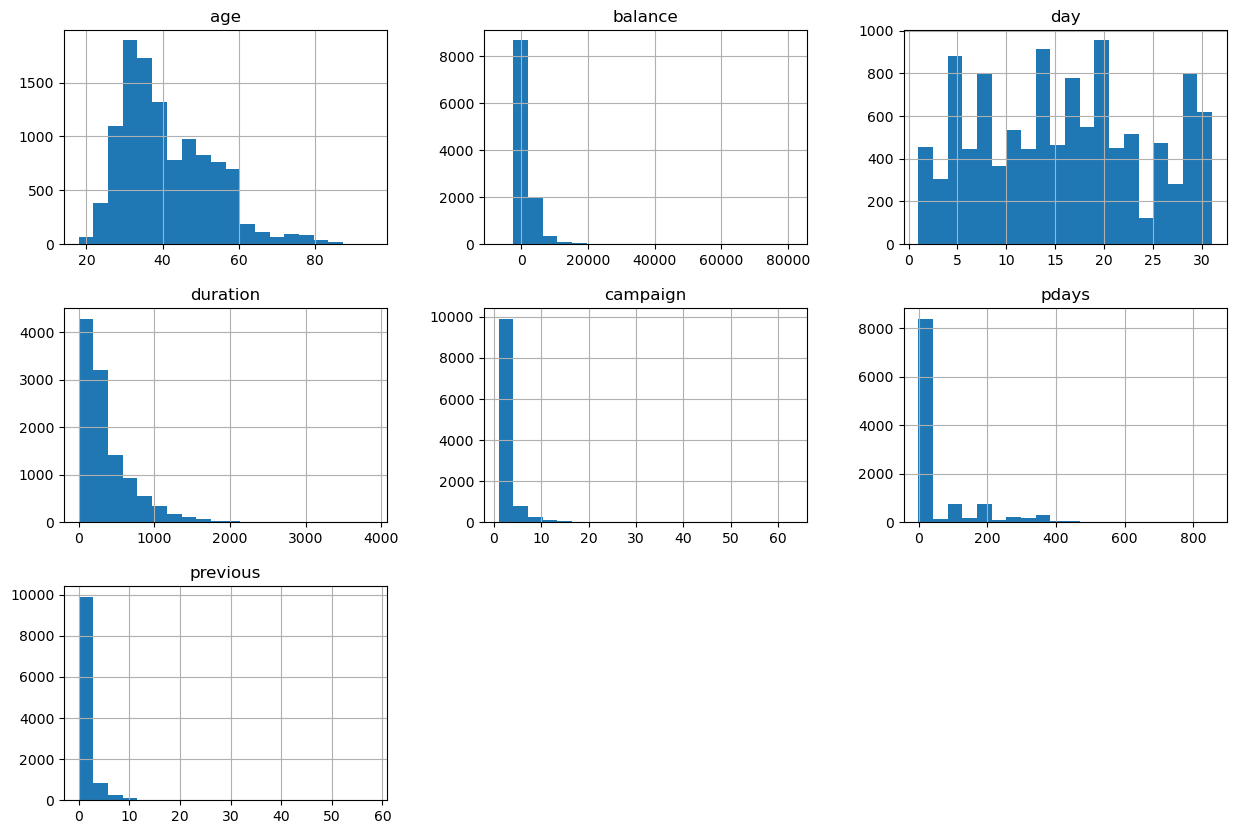

In [24]:
df.hist(bins=20, figsize=(15, 10))
plt.show()


In [25]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### 7. Contage de los valores de cada variable categórica

In [27]:
df = pd.read_csv('bank_dataset.csv')

for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())


job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

### 8. Contar valores nulos por columna

El número de valores nulos se reduce a 10 en "age", 5 en "marital" y 7 en "education", como se ve en la tabla de abajo.

"age" es un valor continuo y los valores nulos se rellenarán con su media.

"marital" y "education" son valores categóricos y se rellenarán con su moda.

In [32]:

df.isnull().sum()


age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### 9. Selección de características

#### 9.1 Matriz de correlación

Como se ve en la matriz de correlación, abajo,  "pdays" y "previous" podrían no ser independientes. Se podría eliminar una de ellas mediante PCA.

In [36]:
df = pd.read_csv('bank_dataset.csv')

# Dado que tenemos distribuciones fuertemente sesgadas, las transformamos para reducir
# el sesgo y los outliers
df['Log_age'] = np.log(df['age'])
df['Log_age'] = winsorize (df ['Log_age'], limits = [0.0, 0.005], inplace = True)

df['yj_balance'], _ = yeojohnson(df['balance'])
df['yj_balance'] = winsorize (df ['yj_balance'], limits = [0.05, 0.08], inplace = True)

df['Log_campaign'] = np.log(df['campaign'])
df['Log_campaign'] = winsorize (df ['Log_campaign'], limits = [0.00, 0.025], inplace = True)

# "pdays" no requiere winsorización.
df['yj_pdays'], _ = yeojohnson(df['pdays'])

df['sqrt_previous'] = np.sqrt(df['previous'])
df['sqrt_previous'] = winsorize (df ['sqrt_previous'], limits = [0.0, 0.05], inplace = True)

# Tomamos las características continuas
dfc = df.loc [:, ['Log_age', 'yj_balance', 'day', 'duration', 'Log_campaign', 'yj_pdays', 'sqrt_previous']]


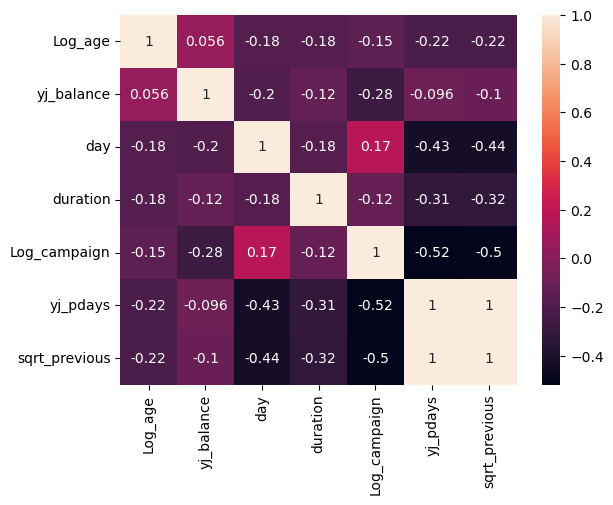

In [37]:
# Creamos la matriz de correlación
corrM = dfc.corr ()

ax = sns.heatmap(corrM.corr(), annot = True)

#### 9.2 Selección de variables continuas

Empezamos el análisis de selección de variables. Calcularemos un "score" para las variables continuas mediante ANOVA. Examinaremos también si los valores "unknown" de "poutcome" pueden recodificarse de modo razonable.

Empezamos por las variables continuas.

Series([], Name: marital, dtype: object)
Series([], Name: marital, dtype: object)
2943    NaN
4737    NaN
9406    NaN
Name: education, dtype: object
Series([], Name: education, dtype: object)
For continuus variables:
Feature 0: 30.534276
Feature 1: 4.890623
Feature 2: 0.063737
Feature 3: 0.098597
Feature 4: 23.772292
Feature 5: 236.226370
Feature 6: 3.198501


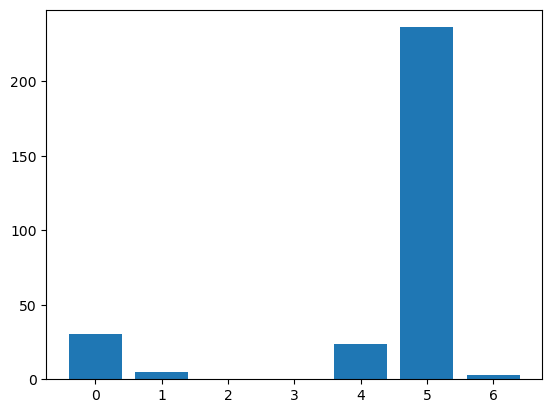

In [41]:
df = pd.read_csv('bank_dataset.csv')

# Valores a filtrar
pout_v = ['other', 'failure', 'success']

# Debemos obtener solamente las filas cuya "poutcome" sea "other", "failure" o "success"
# Las filas con el valor "unknown" son filtradas para calcular el "score" ANOVA.
df = df.loc [df ['poutcome'].isin (pout_v)]

# En la propia columna "poutcome", "other" será sustituido por "failure"
df.loc [df['poutcome'] == 'other', 'poutcome'] = 'failure'

# Eliminamos los valores nulos
age_mean = df ['age'].mean ()
df.loc [df ['age'].isnull(), 'age'] = age_mean

marital_mode = df ['marital'].mode ()
df = df.fillna ({'marital': marital_mode [0]})

education_mode = df ['education'].mode ()
df = df.fillna ({'education': education_mode [0]})

# Seleccionamos primero las variables continuas.
df_X = df.loc [:, ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
df_Y = df.loc [:, ['poutcome']]

# Asignamos un valor entero 'poutcome'.
le = LabelEncoder ()
for col in df_Y.select_dtypes(include='category').columns:
   df_Y [col] = le.fit_transform (df_Y [col])

# La función "SelectKBest" acepta arrays de numpy.
np_X = df_X.values
np_Y = df_Y.values
np_Y = np.ravel(np_Y, order='C')

# Aplicamos el test ANOVA.
fs = SelectKBest (score_func=f_classif, k = 'all')
fs.fit (np_X, np_Y)
np_X = fs.transform (np_X)

# Imprimimos el "score"
print ("For continuus variables:")
for i in range (len (fs.scores_)):
   print ('Feature %d: %f' % (i, fs.scores_[i]))

# Mostramos un histograma con el "score".
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Como se ve las características más relevantes son "pdays", "age", "balance" y "campaign".

Como se ve "pdays" muestra una fuerte correlación con "poutcome". En menor media también "age". Se intentará rellenar dicho campo y comprobar su efecto en la estimación del modelo. Se puede utilizar "KNN imputation" o bien "Iterative imputation".

#### 9.3 Selección de variables categóricas

Calcularemos un "score" para las variables continuas mediante el test "chi quadrado". Examinaremos también si los valores "unknown" de "poutcome" pueden recodificarse de modo razonable.

For categorical variables:
Feature 0: 34.979057
Feature 1: 0.000473
Feature 2: 7.689583
Feature 3: 6.674788
Feature 4: 134.672596
Feature 5: 42.300014
Feature 6: 0.191866
Feature 7: 0.000010


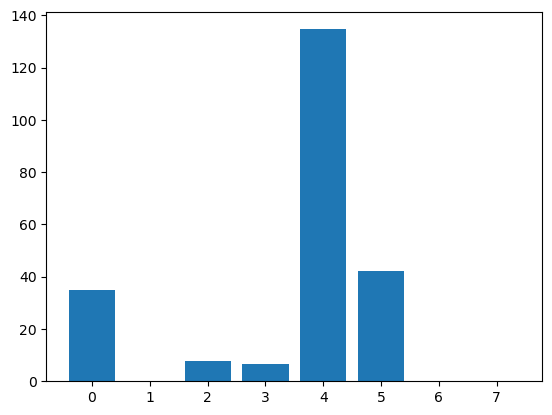

In [46]:
# Despés seleccionamos las variables categóricas.

# Convertimos las variables categóricas al tipo correcto.
convert_dict = {'job':      'category',
               'marital':   'category',
               'education': 'category',
               'default':   'category',
               'housing':   'category',
               'loan':      'category',
               'contact':   'category',
               'month':     'category',
               'poutcome':  'category'
               }

df = df.astype (convert_dict)

df_X = df.loc [:, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']]
df_Y = df.loc [:, ['poutcome']]

# Asignamos valores enteros a las características y a la salida.
le = LabelEncoder ()
for col in df_X.select_dtypes(include='category').columns:
   df_X [col] = le.fit_transform (df_X [col])

for col in df_Y.select_dtypes(include='category').columns:
   df_Y [col] = le.fit_transform (df_Y [col])

# La función "SelectKBest" acepta arrays de numpy.
np_X = df_X.values
np_Y = df_Y.values
np_Y = np.ravel(np_Y, order='C')

# Aplicamos el test chi cuadrado.
fs = SelectKBest (score_func = chi2, k = 'all')
fs.fit(np_X, np_Y)
np_X = fs.transform (np_X)

print; print ("For categorical variables:")
for i in range (len (fs.scores_)):
   print ('Feature %d: %f' % (i, fs.scores_[i]))

# Mostramos un histograma con el "score".
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Las características más relevantes son "housing", "loan" y "job". Algo menos relevantes son "education" y "default".

Como se ve "housing" y, en menor medida "loan" y "job", muestran una fuerte correlación con "poutcome". Ello permitiría recodificar el campo "poutcome". Se intentará rellenar dicho campo y comprobar su efecto en la estimación del modelo. Se puede utilizar "KNN imputation" o bien "Iterative imputation".

### 10. EDA automático con "Sweetviz"

In [50]:
report = sv.analyze(df)
report.show_html('EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Si ponemos atención al histograma "poutcome" vemos que el número de "failure" está muy próximo al número de "success", luego habrá poco desequilibrio de clases. Nótese que hay valores de "poutcome" marcados como "other", se considerarán como "failure". 

### 11. Conclusiones

Podemos resumir la exploración de datos en los siguientes puntos:

1. Las distribuciones de los valores continuos son no normales, se requerirá transformar los datos.
2. Las distribuciones están fuertemente sesgadas, se requerirá la reducción de outliers.
3. Habrá poco desequilibrio de clases en "poutcome".
4. Hay pocos valores nulos y pueden rellenarse con la media o la moda, según el caso.
5. Las características continuas más relevantes son: "pdays", "age", "balance" y "campaign".
6. Las características categóricas más relevantes son: "housing", "loan" y "job", seguidas de "education" y "default".
7. Las 9 anteriores serán las características escogidas en nuestro modelo.
8. El campo "duration", no puede utilizarse puesto que no se dispondrá de dicho dato en el momento de hacer la predicción.
9. El campo "days" muestra valores incorrectos, el día del mes en lugar del día de la semana.

### 12. Anexo

#### 12.1. Diagramas de caja para las características continuas

balance skew:  8.224619112755489
yj balance skew:  1.0168190344052035


{'whiskers': [<matplotlib.lines.Line2D at 0x7efc15f44bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc15f22ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc15f443b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc15f220f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc15f22d80>],
 'means': []}

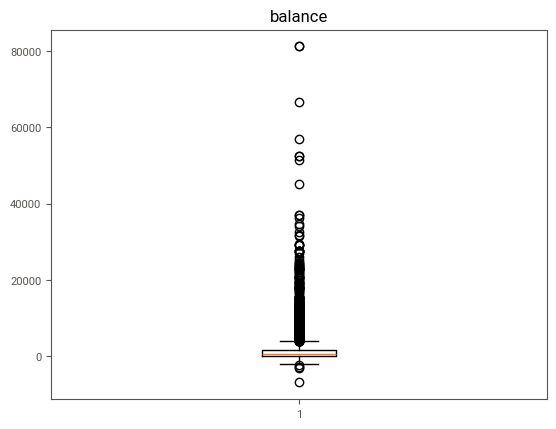

In [56]:
df = pd.read_csv('bank_dataset.csv')

df['yj_balance'], _ = yeojohnson(df['balance'])

print ("balance skew: ", df['balance'].skew ())
print ("yj balance skew: ", df['yj_balance'].skew ())

df['yj_balance'] = winsorize (df ['yj_balance'], limits = [0.05, 0.08], inplace = True)

plt.title ("balance")
plt.boxplot (df ['balance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7efc15e01460>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc15e019a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc15fefbc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc15e01f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc15e021e0>],
 'means': []}

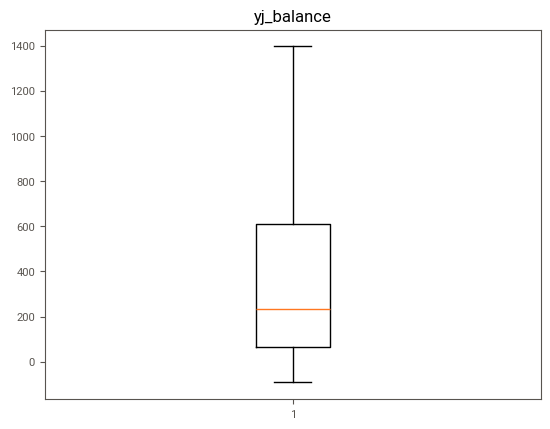

In [57]:
plt.title ("yj_balance")
plt.boxplot (df ['yj_balance'])

campaign skew:  5.545578439825207
log campaign skew:  0.9436066169900181


{'whiskers': [<matplotlib.lines.Line2D at 0x7efc15e8d730>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc15e8dd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc15e8d520>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc15e8e300>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc15e8e5d0>],
 'means': []}

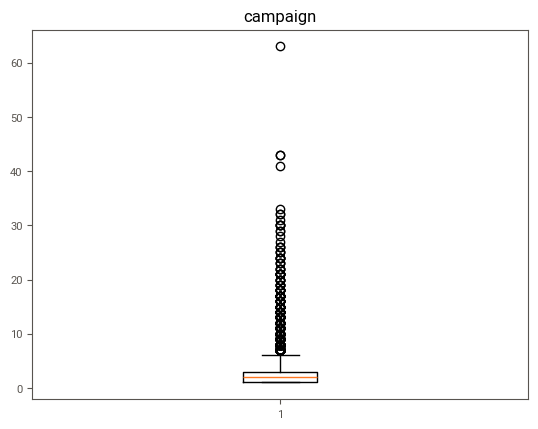

In [58]:
df['Log_campaign'] = np.log(df['campaign'])
print ("campaign skew: ", df['campaign'].skew ())
print ("log campaign skew: ", df['Log_campaign'].skew ())

df['Log_campaign'] = winsorize (df ['Log_campaign'], limits = [0.00, 0.025], inplace = True)

plt.title ("campaign")
plt.boxplot (df ['campaign'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7efc15d00b60>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc15d01190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc15d008f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc15d01730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc15d01a60>],
 'means': []}

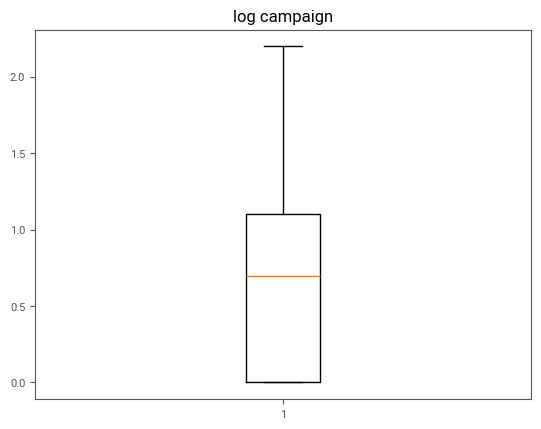

In [59]:
plt.title ("log campaign")
plt.boxplot (df ['Log_campaign'])

age skew:  0.863213797053784
log age skew:  0.20472261174053671


{'whiskers': [<matplotlib.lines.Line2D at 0x7efc15d523c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc15d52900>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc15d520f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc15d52ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc15d53200>],
 'means': []}

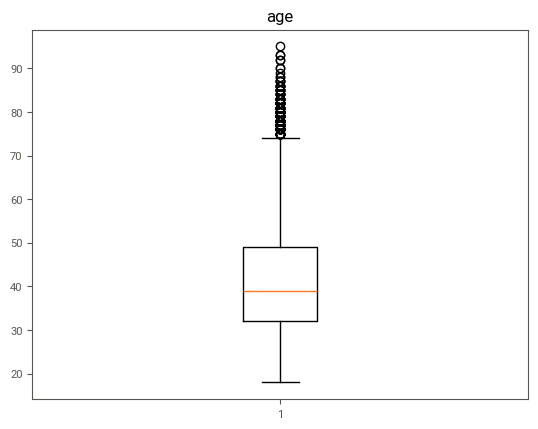

In [60]:
# "age" mean. 
age_mean = df ['age'].mean ()

# Eliminamos los valores nulos
df.loc [df ['age'].isnull(), 'age'] = age_mean

df['Log_age'] = np.log(df['age'])

print ("age skew: ", df['age'].skew ())
print ("log age skew: ", df['Log_age'].skew ())

df['Log_age'] = winsorize (df ['Log_age'], limits = [0.0, 0.005], inplace = True)

plt.title ("age")
plt.boxplot (df ['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7efc15dc4320>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc15dc5e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc15dc5730>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc15dc6420>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc15dc66c0>],
 'means': []}

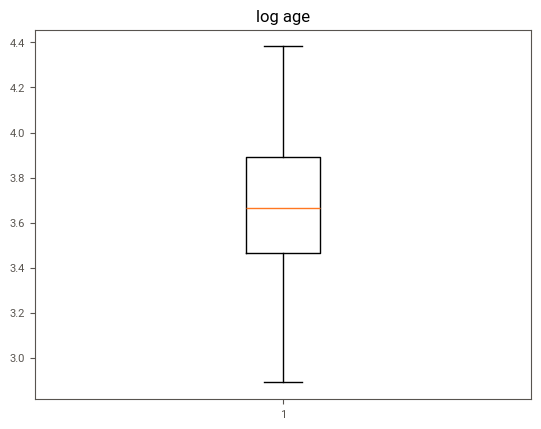

In [61]:
df['Log_age'] = winsorize (df ['Log_age'], limits = [0.0, 0.005], inplace = True)

plt.title ("log age")
plt.boxplot (df ['Log_age'])

pdays skew:  2.4499856341959547
yj pdays skew:  1.1346511938613846


{'whiskers': [<matplotlib.lines.Line2D at 0x7efc15c31760>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc15c31d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc15c31520>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc15c322d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc15c32570>],
 'means': []}

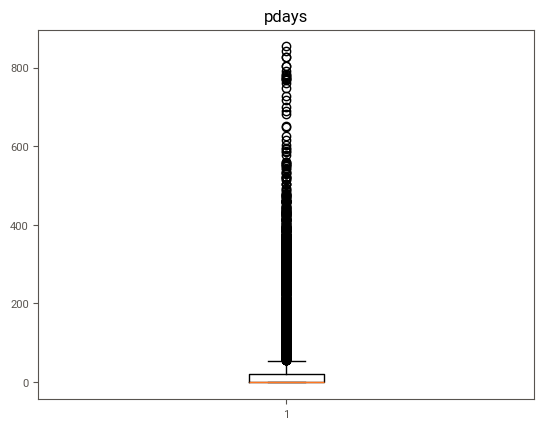

In [62]:
df['yj_pdays'], _ = yeojohnson(df['pdays'])

print ("pdays skew: ", df['pdays'].skew ())
print ("yj pdays skew: ", df['yj_pdays'].skew ())

plt.title ("pdays")
plt.boxplot (df ['pdays'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7efc15c76990>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc15c76f30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc15c766c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc15c774d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc15c77740>],
 'means': []}

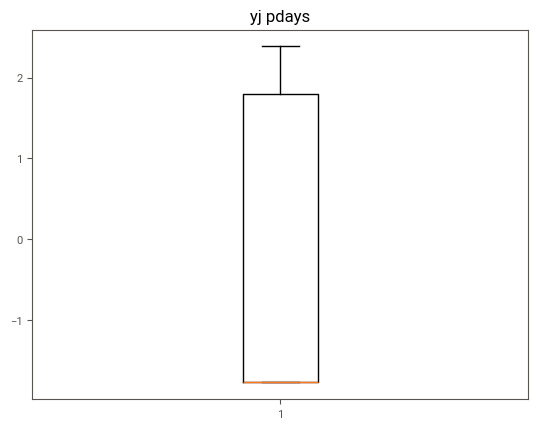

In [63]:
plt.title ("yj pdays")
plt.boxplot (df ['yj_pdays'])

previous skew:  7.335298178154558
sqrt previous skew:  2.0633895537717617


{'whiskers': [<matplotlib.lines.Line2D at 0x7efc15cd3680>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc15cd3cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc15cd1460>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc15afc320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc15afc650>],
 'means': []}

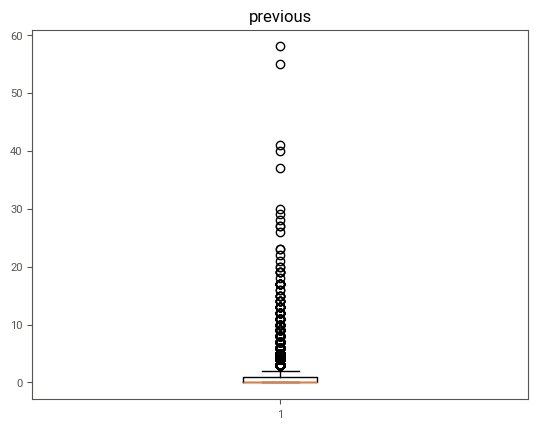

In [64]:
df['sqrt_previous'] = np.sqrt(df['previous'])
print ("previous skew: ", df['previous'].skew ())
print ("sqrt previous skew: ", df['sqrt_previous'].skew ())

df['sqrt_previous'] = winsorize (df ['sqrt_previous'], limits = [0.0, 0.05], inplace = True)

plt.title ("previous")
plt.boxplot (df ['previous'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7efc15b42810>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc15b42de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc15b266f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc15b43380>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc15b436b0>],
 'means': []}

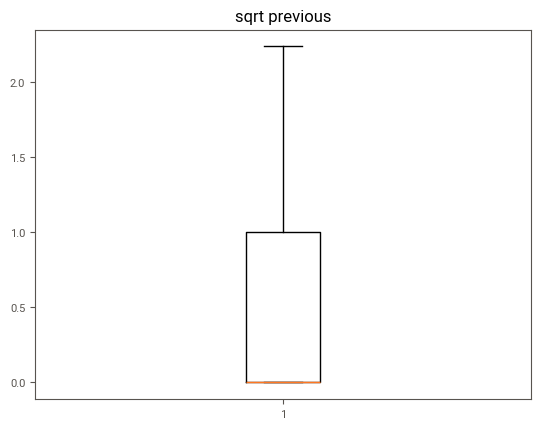

In [65]:
plt.title ("sqrt previous")
plt.boxplot (df ['sqrt_previous'])

# 